# An example of running the METS-R SIM interactively

# Section 1: Start, reset and terminate the simulation

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient

In [2]:
config = read_run_config("configs/run_cosim_CARLAT5.json")
config.verbose = True # set to True to see the message

In [3]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

docker run -d --rm --mount src="c:\Users\ALei\Documents\GitHub\METS-R_HPC\output\CARLAT05_20251226_224911_seed_42",target=/home/test,type=bind --net=host ennuilei/mets-r_sim  /bin/bash -c "cd /home/test && /usr/lib/jvm/java-1.8.0-openjdk-amd64/bin/java -Xmx16G -cp /home/Eclipse/plugins/repast.simphony.runtime_2.7.0/bin:/home/Eclipse/plugins/repast.simphony.runtime_2.7.0/lib/*:/home/Eclipse/plugins/repast.simphony.batch_2.7.0/bin:/home/Eclipse/plugins/repast.simphony.batch_2.7.0/lib/*:/home/Eclipse/plugins/repast.simphony.distributed.batch_2.7.0/bin:/home/Eclipse/plugins/repast.simphony.distributed.batch_2.7.0/lib/*:/home/Eclipse/plugins/repast.simphony.core_2.7.0/bin:/home/Eclipse/plugins/repast.simphony.core_2.7.0/lib/*:/home/METS-R_SIM/METS_R/bin:/home/METS-R_SIM/METS_R/lib/*:/home/Eclipse/plugins/repast.simphony.bin_and_src_2.7.0/repast.simphony.bin_and_src.jar:/home/Eclipse/plugins/repast.simphony.essentials_2.7.0/bin:/home/Eclipse/plugins/repast.simphony.gis_2.7.0/bin:/home/Eclips

In [4]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connected to ws://localhost:4000
Connection established!
('2025-12-26 22:49:28', 'RECEIVED', (('TYPE', 'ANS_ready'),))
('2025-12-26 22:49:28', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [5]:
# start the visualization server so the trajectory can be visualized at https://engineering.purdue.edu/HSEES/METSRVis/
client.start_viz()

Serving output/CARLAT05_20251226_224911_seed_42\trajectory_output\2025-12-26-0949-20 with CORS enabled on port 8000...


127.0.0.1 - - [26/Dec/2025 22:49:45] "GET / HTTP/1.1" 200 -
----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 51693)
Traceback (most recent call last):
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 382, in <lambda>
    server_address = ('', port)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 368, in __init__
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\http\server.py", line 668, in __init__
    super().__init__(*args, **kwargs)
  File

In [6]:
client.tick(1000)

('2025-12-26 22:49:32', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 1000)))
('2025-12-26 22:49:32', 'RECEIVED', (('TICK', 1000), ('TYPE', 'STEP')))


In [7]:
# Generating 50 trips in 500 ticks.
for i in range(500):
      if(i % 10 == 0):
            client.generate_trip(i, -1, -1)
      client.tick(1)

('2025-12-26 22:49:33', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-12-26 22:49:33', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 11, 'destination': 18, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-12-26 22:49:33', 'SENT', (('TYPE', 'STEP'), ('TICK', 1000), ('NUM', 1)))
('2025-12-26 22:49:33', 'RECEIVED', (('TICK', 1001), ('TYPE', 'STEP')))
('2025-12-26 22:49:33', 'SENT', (('TYPE', 'STEP'), ('TICK', 1001), ('NUM', 1)))
('2025-12-26 22:49:33', 'RECEIVED', (('TICK', 1002), ('TYPE', 'STEP')))
('2025-12-26 22:49:33', 'SENT', (('TYPE', 'STEP'), ('TICK', 1002), ('NUM', 1)))
('2025-12-26 22:49:33', 'RECEIVED', (('TICK', 1003), ('TYPE', 'STEP')))
('2025-12-26 22:49:33', 'SENT', (('TYPE', 'STEP'), ('TICK', 1003), ('NUM', 1)))
('2025-12-26 22:49:33', 'RECEIVED', (('TICK', 1004), ('TYPE', 'STEP')))
('2025-12-26 22:49:33', 'SENT', (('TYPE', 'STEP'), ('TICK', 1004), ('NUM', 1)))
('2025-12-26 22:49:33', 'RECEIVED', (('T

In [8]:
# reset the simulation using CARLA Town05's map
client.reset()

('2025-12-26 22:49:35', 'SENT', (('TYPE', 'CTRL_reset'),))
('2025-12-26 22:49:35', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-12-26 22:49:35', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-12-26 22:49:44', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))
Visualization server stopped.
Serving output/CARLAT05_20251226_224911_seed_42\trajectory_output\2025-12-26-0949-35 with CORS enabled on port 8000...


127.0.0.1 - - [26/Dec/2025 22:50:00] "GET / HTTP/1.1" 200 -
----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 61892)
Traceback (most recent call last):
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 382, in <lambda>
    server_address = ('', port)
  File "c:\Users\ALei\Documents\GitHub\METS-R_HPC\utils\util.py", line 368, in __init__
  File "c:\Users\ALei\anaconda3\envs\carla2\lib\http\server.py", line 668, in __init__
    super().__init__(*args, **kwargs)
  File

In [9]:
# This is doing the same thing as above, but in a more efficient way
for i in range(50):
      client.generate_trip(i, -1, -1)
      client.tick(10)

('2025-12-26 22:49:54', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 0, 'orig': -1, 'dest': -1}])))
('2025-12-26 22:49:54', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 9, 'destination': 16, 'ID': 0}]), ('TYPE', 'CTRL_generateTrip')))
('2025-12-26 22:49:54', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-12-26 22:49:54', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-12-26 22:49:54', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 1, 'orig': -1, 'dest': -1}])))
('2025-12-26 22:49:54', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': 21, 'destination': 8, 'ID': 1}]), ('TYPE', 'CTRL_generateTrip')))
('2025-12-26 22:49:54', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-12-26 22:49:54', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-12-26 22:49:54', 'SENT', (('TYPE', 'CTRL_generateTrip'), ('DATA', [{'vehID': 2, 'orig': -1, 'dest': -1}])))
('2025-12-26 22:49:54', 'RECEIVED', (('CODE', 

In [10]:
# one can close the connection without terminating the simulation
client.close()

# and reestablish the connection ideally from the other machine
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=True)

Visualization server stopped.
Connected to ws://localhost:4000
Connection established!
('2025-12-26 22:50:04', 'RECEIVED', (('TICK', 500), ('TYPE', 'STEP')))


In [11]:
client.reset()

('2025-12-26 22:50:07', 'SENT', (('TYPE', 'CTRL_reset'),))
('2025-12-26 22:50:08', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_reset')))
('2025-12-26 22:50:08', 'SENT', (('TYPE', 'STEP'), ('TICK', -1), ('NUM', 1)))
('2025-12-26 22:50:14', 'RECEIVED', (('TICK', 0), ('TYPE', 'STEP')))


In [12]:
# generate trips between roads
import random
road_ids = client.query_road()
road_ids

('2025-12-26 22:50:15', 'SENT', (('TYPE', 'QUERY_road'),))
('2025-12-26 22:50:15', 'RECEIVED', (('id_list', [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]), ('orig_id', ['-0', '-1', '-10', '-11', '-13', '-14', '-16', '-18', '-19', '-2', '-20', '-21', '-22', '-23', '-24', '-26', '-27', '-28', '-29', '-3', '-30', '-32', '-36', '-38', '-39', '-4', '-41', '-42', '-43', '-44', '-45', '-46', '-47', '-48', '-5', '-50', '-51', '-52', '-6', '-7', '-8', '-9', '0', '1', '10', '11', '13', '15', '17', '19', '2', '20', '21', '22', '23', '24', '25', '27', '28', '3', '31', '33', '35', '37', '39', '4', '40', '41', '42', '43', '44', '45', '46', '48', '49', '51', '6', '7', '8', '9']), ('TYPE', 'ANS_road')))


{'id_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80],
 'orig_id': ['-0',
  '-1',
  '-10',
  '-11',
  '-13',
  '-14',
  '-16',
  '-18',
  '-19',
  '-2',
  '-20',
  '-21',
  '-22',
  '-23',
  '-24',
  '-26',
  '-27',
  '-28',
  '-29',
  '-3',
  '-30',
  '-32',
  '-36',
  '-38',
  '-39',
  '-4',
  '-41',
  '-42',
  '-43',
  '-44',
  '-45',
  '-46',
  '-47',
  '-48',
  '-5',
  '-50',
  '-51',
  '-52',
  '-6',
  '-7',
  '-8',
  '-9',
  '0',
  '1',
  '10',
  '11',
  '13',
  '15',
  '17',
  '19',
  '2',
  '20',
  '21',
  '22',
  '23',
  '24',
  '25',
  '27',
  '28',
  '3'

In [13]:
for i in range(500):
      client.tick(10)
      origin_road = random.choice(road_ids['orig_id'])
      destination_road = random.choice(road_ids['orig_id'])
      client.generate_trip_between_roads(i, origin_road, destination_road)

('2025-12-26 22:50:16', 'SENT', (('TYPE', 'STEP'), ('TICK', 0), ('NUM', 10)))
('2025-12-26 22:50:16', 'RECEIVED', (('TICK', 10), ('TYPE', 'STEP')))
('2025-12-26 22:50:16', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 0, 'orig': '24', 'dest': '-46'}])))
('2025-12-26 22:50:16', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '24', 'destination': '-46', 'vehID': 0}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-12-26 22:50:16', 'SENT', (('TYPE', 'STEP'), ('TICK', 10), ('NUM', 10)))
('2025-12-26 22:50:16', 'RECEIVED', (('TICK', 20), ('TYPE', 'STEP')))
('2025-12-26 22:50:16', 'SENT', (('TYPE', 'CTRL_genTripBwRoads'), ('DATA', [{'vehID': 1, 'orig': '-18', 'dest': '46'}])))
('2025-12-26 22:50:16', 'RECEIVED', (('CODE', 'OK'), ('DATA', [{'STATUS': 'OK', 'origin': '-18', 'destination': '46', 'vehID': 1}]), ('TYPE', 'CTRL_genTripBwRoads')))
('2025-12-26 22:50:16', 'SENT', (('TYPE', 'STEP'), ('TICK', 20), ('NUM', 10)))
('2025-12-26 22:50:16', 'RECEIVED', (('TICK', 

In [14]:
# stop the visualization server, note visualization server is already stopped when the previous client is closed so nothing is going to be printed
client.stop_viz()

In [15]:
# terminate the simulation
client.terminate()

('2025-12-26 22:50:22', 'SENT', (('TYPE', 'CTRL_end'),))
('2025-12-26 22:50:22', 'RECEIVED', (('CODE', 'OK'), ('TYPE', 'CTRL_end')))


# Section 2: Query APIs

In this example, we will see how to use query to extract data from the simulation.

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient

In [2]:
config = read_run_config("configs/run_interactive_NYC.json")
config.verbose = True # set to True to see the message

In [3]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

No port number specified, find available ports for simulation instances
Container ID: 4f8e5f4b1aa1a3050521565f42b91ed413cc7aeb5db0c125d39328c513d88445

Error msg: 
['output/NYC_20251226_232045_seed_42']


In [4]:
# If no metsr_port is specified, the runner will find the port automatically 
config.ports

[53401]

In [5]:
# Better to  set up a larger timeout (default is 30s) if your map/vehicle number is huge
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port = config.ports[0], verbose=False, timeout=300) 

Attempt to connect to ws://localhost:53401 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [6]:
# Great! Now we run the simulation for 0.5 h (0.1s/tick correspond to the real world time) and then query the data
# Since this one is going to take a little bit longer, we set wait_forever to True
sim_client.tick(18000, wait_forever=True)

Now let's do some query.

In [7]:
# if no vehicle id is specified, a list of all buses will be returned
sim_client.query_bus()

{'id_list': [4032,
  4033,
  4034,
  4035,
  4036,
  4037,
  4038,
  4039,
  4000,
  4001,
  4002,
  4003,
  4004,
  4005,
  4006,
  4007,
  4008,
  4009,
  4010,
  4011,
  4012,
  4013,
  4014,
  4015,
  4016,
  4017,
  4018,
  4019,
  4020,
  4021,
  4022,
  4023,
  4024,
  4025,
  4026,
  4027,
  4028,
  4029,
  4030,
  4031],
 'TYPE': 'ANS_bus'}

In [8]:
# this vehicle has reached the second stop
sim_client.query_bus(4032)

{'DATA': [{'battery_state': 234.86007361996252,
   'route': '1640002',
   'current_stop': 3,
   'pass_num': 0,
   'ID': 4032}],
 'TYPE': 'ANS_bus'}

In [9]:
# similarly, one can query taxis
sim_client.query_taxi()

{'id_list': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,


In [10]:
# This vehicle is in state 0, meaning it is parking
sim_client.query_taxi(23)

{'DATA': [{'pass_num': 0,
   'origin': 108,
   'x': -73.94641681660696,
   'y': 40.73143487760662,
   'ID': 23,
   'state': 5,
   'dest': 108}],
 'TYPE': 'ANS_taxi'}

In [11]:
# Find a taxi, which is carrying passengers
for i in sim_client.query_taxi()['id_list']:
      res = sim_client.query_taxi(i)
      if res['DATA'][0]['pass_num']>0:
            print(i)
            print(res)
            break

1
{'DATA': [{'pass_num': 1, 'origin': 215, 'x': -73.92169963898903, 'y': 40.733043355284494, 'ID': 1, 'state': 1, 'dest': 181}], 'TYPE': 'ANS_taxi'}


In [12]:
# One can also query the facilities in the simulation
sim_client.query_road()

{'id_list': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157

In [13]:
# This id can be found in the road csv (or SUMO XML) in the data folder
sim_client.query_road('-1103160164')

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'down_stream_road': ['-223489715#1', '1103160164'],
   'avg_travel_time': 0.6881209296457934,
   'length': 21.533230627219883,
   'ID': '-1103160164',
   'energy_consumed': 0.0,
   'r_type': 1}],
 'TYPE': 'ANS_road'}

In [14]:
# Also, a list of ID can be used to query multiple roads
sim_client.query_road(sim_client.query_road()['orig_id'][:5])

{'DATA': [{'speed_limit': 31.2928,
   'num_veh': 0,
   'down_stream_road': ['-730891311', '1000767813#0'],
   'avg_travel_time': 0.6705407306421266,
   'length': 20.983096975837938,
   'ID': '-1000767813#0',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'down_stream_road': ['-1000767813#0'],
   'avg_travel_time': 3.2554446898294533,
   'length': 101.87197958989512,
   'ID': '-1000767813#1',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'down_stream_road': ['-1000767813#1'],
   'avg_travel_time': 3.248811767907337,
   'length': 101.66441689077072,
   'ID': '-1000767813#2',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'down_stream_road': ['-1000767813#2'],
   'avg_travel_time': 10.854738919311911,
   'length': 339.67517405424377,
   'ID': '-1000767813#7',
   'energy_consumed': 0.0,
   'r_type': 1},
  {'speed_limit': 31.2928,
   'num_veh': 0,
   'down_str

In [15]:
sim_client.query_signal()

{'id_list': [1,
  2,
  4,
  10,
  11,
  12,
  13,
  15,
  16,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  34,
  36,
  42,
  44,
  45,
  46,
  49,
  51,
  58,
  72,
  74,
  81,
  84,
  91,
  98,
  100,
  106,
  108,
  109,
  115,
  123,
  125,
  126,
  129,
  135,
  137,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  152,
  153,
  154,
  155,
  157,
  158,
  159,
  163,
  164,
  165,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  187,
  188,
  189,
  190,
  191,
  192,
  194,
  199,
  206,
  211,
  212,
  216,
  218,
  219,
  222,
  224,
  226,
  231,
  232,
  236,
  238,
  243,
  249,
  255,
  257,
  258,
  262,
  263,
  264,
  265,
  266,
  267,
  271,
  273,
  275,
  276,
  277,
  280,
  282,
  292,
  293,
  295,
  296,
  297,
  299,
  300,
  301,
  302,
  303,
  306,
  307,
  310,
  315,
  319,
  322,
  323,
  325,
  326,
  328,
  329,
  330,
  331,
  332,
  334,
  3

In [16]:
sim_client.query_signal(2)

{'DATA': [{'nex_state': 1,
   'next_update_time': 18210,
   'ID': 2,
   'state': 0,
   'phase_ticks': [210, 15, 225]}],
 'TYPE': 'ANS_signal'}

In [18]:
sim_client.query_signal_between_roads('-1001065257', '119628652')

{'DATA': [{'next_state': 1,
   'upStreamRoad': '-1001065257',
   'STATUS': 'OK',
   'next_update_tick': 18330,
   'downStreamRoad': '119628652',
   'signalID': 322,
   'junction_id': 2866,
   'state': 0,
   'phase_ticks': [330, 60, 60]}],
 'TYPE': 'ANS_signalForConnection'}

In [19]:
sim_client.query_chargingStation()

{'id_list': [-1,
  -2,
  -3,
  -4,
  -5,
  -6,
  -7,
  -8,
  -9,
  -10,
  -11,
  -12,
  -13,
  -14,
  -15,
  -16,
  -17,
  -18,
  -19,
  -20,
  -21,
  -22,
  -23,
  -24,
  -25,
  -26,
  -27,
  -28,
  -29,
  -30,
  -31,
  -32,
  -33,
  -34,
  -35,
  -36,
  -37,
  -38,
  -39,
  -40,
  -41,
  -42,
  -43,
  -44,
  -45,
  -46,
  -47,
  -48,
  -49,
  -50,
  -51,
  -52,
  -53,
  -54,
  -55,
  -56,
  -57,
  -58,
  -59,
  -60,
  -61,
  -62,
  -63,
  -64,
  -65,
  -66,
  -67,
  -68,
  -69,
  -70,
  -71,
  -72,
  -73,
  -74,
  -75,
  -76,
  -77,
  -78,
  -79,
  -80,
  -81,
  -82,
  -83,
  -84,
  -85,
  -86,
  -87,
  -88,
  -89,
  -90,
  -91,
  -92,
  -93,
  -94,
  -95,
  -96,
  -97,
  -98,
  -99,
  -100,
  -101,
  -102,
  -103,
  -104,
  -105,
  -106,
  -107,
  -108,
  -109,
  -110,
  -111,
  -112,
  -113,
  -114,
  -115,
  -116,
  -117,
  -118,
  -119,
  -120,
  -121,
  -122,
  -123,
  -124,
  -125,
  -126,
  -127,
  -128,
  -129,
  -130,
  -131,
  -132,
  -133,
  -134,
  -135,
  -136,
  -137,
 

In [20]:
sim_client.query_chargingStation(-3)

{'DATA': [{'l2_price': 2.0,
   'l2_charger': 0,
   'dcfc_price': 30.0,
   'dcfc_charger': 0,
   'bus_charger': 0,
   'x': -73.97696969679414,
   'y': 40.72376040114997,
   'ID': -3,
   'num_available_dcfc': 0,
   'num_available_l2': 0}],
 'TYPE': 'ANS_chargingStation'}

Cool, we have went through the query APIs. Let's see how it can be used.

In [21]:
xs, ys = [], []
taxi_demand, bus_demand, taxi_stock = [], [], []

# Run a 30 min simulation, record the trajectory every 1s, and monitor the demand every 30s
for i in range(3600):
      query_res = sim_client.query_taxi(0)
      xs.append(query_res['DATA'][0]['x'])
      ys.append(query_res['DATA'][0]['y'])

      if i % 60 == 0:
            taxi_demand.append(sim_client.query_zone(141)['DATA'][0]['taxi_demand'])
            bus_demand.append(sim_client.query_zone(141)['DATA'][0]['bus_demand'])
            taxi_stock.append(sim_client.query_zone(141)['DATA'][0]['veh_stock'])

      sim_client.tick(5)

In [26]:
# !pip install contextily
# !pip install geopandas

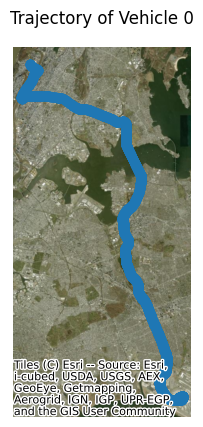

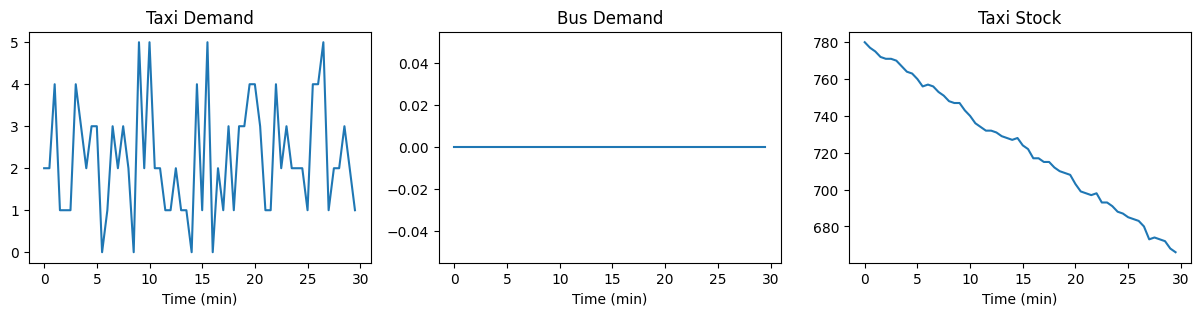

In [25]:
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd

# Example 1: Collect and visualize the trajectory of one vehicle
fig, ax = plt.subplots()

# add the NYC map
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xs, ys), crs='EPSG:4326').to_crs(epsg=3857)
gdf.plot(ax = ax)
ax.set_title("Trajectory of Vehicle 0")
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

ax.set_axis_off()

plt.show()

# Example 2: Minitor the state of a zone
fig, axs = plt.subplots(1,3, figsize=(15,3), sharex = True)

# The first two hours are 0-2:00, so the demand is low
axs[0].plot(taxi_demand)
axs[0].set_title("Taxi Demand")

axs[1].plot(bus_demand)
axs[1].set_title("Bus Demand")

axs[2].plot(taxi_stock)
axs[2].set_title("Taxi Stock")
for i in range(3):
      axs[i].set_xticks(range(0, 61, 10))
      axs[i].set_xticklabels(range(0, 31, 5))
      axs[i].set_xlabel("Time (min)")

plt.show()

In [27]:
sim_client.terminate()

# Section 3: Control APIs

In this section, we will see how to interact with the simulation.

In [28]:
from utils.util import *
from clients.METSRClient import METSRClient

In [29]:
config = read_run_config("configs/run_interactive_NYC.json")
config.verbose = True # set to True to see the message

In [30]:
sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

No port number specified, find available ports for simulation instances
Container ID: 72ee6de39ea70bc1dac26945b67fc4f69bed4d4192a3ff7ab8778fd31ee3d2a7

Error msg: 
['output/NYC_20251226_235450_seed_42']


In [31]:
client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=config.ports[0], verbose=False, timeout=300)

Attempt to connect to ws://localhost:65011 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [32]:
# no private vehicle is in the simulation yet
client.query_vehicle(private_veh = True)['private_vids']

[]

## Private trips

In [33]:
# generate a private vehicle trip
client.generate_trip(0, -1, -1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 77, 'destination': 3, 'ID': 0}],
 'TYPE': 'CTRL_generateTrip'}

In [34]:
# state 8 means the vehicle is performing a private trip
client.query_vehicle(0, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.93876842364685,
   'y': 40.79139655697849,
   'ID': 5,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

In [35]:
# can also generate a private vehicle trip between two roads
import random
road_ids = client.query_road()
origin_road = random.choice(road_ids['orig_id'])
destination_road = random.choice(road_ids['orig_id'])

client.generate_trip_between_roads(1, origin_road, destination_road)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK',
   'origin': '182594636#5',
   'destination': '46933093#0',
   'vehID': 1}],
 'TYPE': 'CTRL_genTripBwRoads'}

In [36]:
client.query_vehicle(1, private_veh = True)

{'DATA': [{'acc': 0.0,
   'bearing': 0.0,
   'x': -73.82173011849561,
   'y': 40.82396553907894,
   'ID': 6,
   'state': 8,
   'v_type': 3,
   'speed': 0.0}],
 'TYPE': 'ANS_vehicle'}

## Taxi trips

In [37]:
client.query_taxi(100)

{'DATA': [{'pass_num': 0,
   'origin': 132,
   'x': -73.7872104492162,
   'y': 40.64671432368773,
   'ID': 100,
   'state': 0,
   'dest': 132}],
 'TYPE': 'ANS_taxi'}

In [38]:
# generate a taxi trip with specific vehicles
client.dispatch_taxi(100, 132, 34, 2)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 100}],
 'TYPE': 'CTRL_dispatchTaxi'}

In [39]:
# We see the veh's destination is still 140, this is because it is in a pickup trip (state 6)
client.query_taxi(100)

{'DATA': [{'pass_num': 2,
   'origin': 132,
   'x': -73.7872104492162,
   'y': 40.64671432368773,
   'ID': 100,
   'state': 6,
   'dest': 132}],
 'TYPE': 'ANS_taxi'}

In [ ]:
# let's tick the simulation for 360s 
client.tick(1800)

In [41]:
# aha
client.query_taxi(100)

{'DATA': [{'pass_num': 0,
   'origin': 34,
   'x': -73.79039799876804,
   'y': 40.64630608193704,
   'ID': 100,
   'state': 5,
   'dest': 34}],
 'TYPE': 'ANS_taxi'}

In [42]:
client.query_zone(140)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 0,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 140,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

In [43]:
# generate a taxi request without specific vehicles
client.add_taxi_requests(140, 181, 3)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 140}],
 'TYPE': 'CTRL_addTaxiRequests'}

In [44]:
# this will take effect when the next round of demand processing, which happens every 60s in this scenario
client.tick(600)

In [45]:
client.query_zone(140)

{'DATA': [{'veh_stock': 0,
   'taxi_demand': 1,
   'bus_demand': 0,
   'x': -73.9537822370563,
   'y': 40.81797514762926,
   'ID': 140,
   'z_type': 0}],
 'TYPE': 'ANS_zone'}

Note: for taxi requests, one can also use orgin road id and dest road id to eliminate uncertainty.

## Bus schedules

In [46]:
buses = client.query_bus()['id_list']
buses

[4032,
 4033,
 4034,
 4035,
 4036,
 4037,
 4038,
 4039,
 4000,
 4001,
 4002,
 4003,
 4004,
 4005,
 4006,
 4007,
 4008,
 4009,
 4010,
 4011,
 4012,
 4013,
 4014,
 4015,
 4016,
 4017,
 4018,
 4019,
 4020,
 4021,
 4022,
 4023,
 4024,
 4025,
 4026,
 4027,
 4028,
 4029,
 4030,
 4031]

In [47]:
# Now, let's tick a little bit longer to let the bus operate
flag = True
while flag:
      client.tick(100)
      for bus in buses:
            if client.query_bus(bus)['DATA'][0]['route'] != -1:
                  print("Tick: ", client.current_tick)
                  print(bus)
                  flag = False
                  break
      if client.current_tick>=20000:
            break

Tick:  2500
4032


In [48]:
# Our target is this bus
client.query_bus(4032)

{'DATA': [{'battery_state': 236.27976228578035,
   'route': '1640002',
   'current_stop': 0,
   'pass_num': 0,
   'ID': 4032}],
 'TYPE': 'ANS_bus'}

In [50]:
client.query_bus_route('1640002')

{'DATA': [{'stopRoads': ['226041020#0',
    '458180188#0',
    '1189567313#8',
    '-43242499#23',
    '226041020#0'],
   'routeID': 26,
   'stopZones': [181, 157, 228, 176, 181],
   'routeName': '1640002'}],
 'TYPE': 'ANS_getBusRoute'}

In [51]:
# generate a bus trip with specific vehicles
client.assign_request_to_bus(4032, 157, 176, 1)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_assignRequestToBus'}

In [52]:
# this bus has not departed yet
client.query_bus(4032)

{'DATA': [{'battery_state': 236.27976228578035,
   'route': '1640002',
   'current_stop': 0,
   'pass_num': 0,
   'ID': 4032}],
 'TYPE': 'ANS_bus'}

In [53]:
# wait until the bus arrives at the first stop
while True:
      client.tick(1000, wait_forever = True)
      if client.query_bus(4032)['DATA'][0]['current_stop'] == 1:
            break

In [54]:
# aha, we see the added request 
client.query_bus(4032)

{'DATA': [{'battery_state': 236.1849917088842,
   'route': '1640002',
   'current_stop': 1,
   'pass_num': 1,
   'ID': 4032}],
 'TYPE': 'ANS_bus'}

In [55]:
# let's teleport the bus!
client.query_vehicle(4032, private_veh = False)

{'DATA': [{'acc': 0.4332336235871297,
   'road': '46522003#0',
   'bearing': 119.24536644474057,
   'x': -73.96882717947628,
   'y': 40.75499101740348,
   'dist': 18.36555964479428,
   'ID': 4032,
   'state': 0,
   'v_type': 2,
   'speed': 24.860917311401106,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

## Teleportation & acceleration control

In [56]:
# teleport a vehicle to a specific location (must within the same road), the fourth parameter is the target distance to the next intersection
client.teleport_trace_replay_vehicle(4032, roadID='46522003#0', laneID=0, dist=5.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_teleportTraceReplayVeh'}

In [57]:
# let's check the teleported vehicle
client.query_vehicle(4032, private_veh = False)

{'DATA': [{'acc': 0.4332336235871297,
   'road': '46522003#0',
   'bearing': 119.20038408877849,
   'x': -73.96868905873889,
   'y': 40.75493224553946,
   'dist': 5.0,
   'ID': 4032,
   'state': 0,
   'v_type': 2,
   'speed': 24.860917311401106,
   'lane': 0}],
 'TYPE': 'ANS_vehicle'}

In [58]:
# force the vehicle to take the specified acceleration
client.control_vehicle(4032, 2.0, private_veh = False)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 4032}],
 'TYPE': 'CTRL_controlVeh'}

## Traffic signal control

In [61]:
# First, let's query the signal to get its current state
signal_info = client.query_signal_between_roads('-1001065257', '119628652')
print("Current signal state:", signal_info)

# Get the signal ID from the query result
if 'DATA' in signal_info and len(signal_info['DATA']) > 0:
    signal_id = signal_info['DATA'][0]['signalID']
    print(f"\nSignal ID: {signal_id}")
    
    # Example 1: Update signal phase (0=Green, 1=Yellow, 2=Red)
    # Change the signal to green phase
    result = client.update_signal(signal_id, targetPhase=0)
    print("\n1. Updated signal to Green phase:")
    print(result)
    
    # Tick the simulation to see the change
    client.tick(10)
    
    # Query again to see the updated state
    updated_info = client.query_signal(signal_id)
    print("\nSignal state after phase update:", updated_info)
    
    # Example 2: Update signal phase with time offset
    # Set signal to yellow phase with 2 seconds offset
    result = client.update_signal(signal_id, targetPhase=1, phaseTime=2)
    print("\n2. Updated signal to Yellow phase with 2s offset:")
    print(result)
    
    client.tick(10)
    
    # Example 3: Update signal timing (green, yellow, red durations in seconds)
    # Set green=30s, yellow=5s, red=25s
    result = client.update_signal_timing(signal_id, greenTime=30, yellowTime=5, redTime=25)
    print("\n3. Updated signal timing (Green:30s, Yellow:5s, Red:25s):")
    print(result)
    
    client.tick(10)
    
    # Example 4: Set a complete phase plan (timing + starting state + offset)
    # This sets the entire phase plan: green=40s, yellow=6s, red=30s, start at green, with 5s offset
    result = client.set_signal_phase_plan(signal_id, greenTime=40, yellowTime=6, redTime=30, 
                                          startPhase=0, phaseOffset=5)
    print("\n4. Set complete phase plan (Green:40s, Yellow:6s, Red:30s, Start:Green, Offset:5s):")
    print(result)
    
    client.tick(10)
    
    # Example 5: Set phase plan with tick-level precision (more precise control)
    # Assuming 0.1s per tick: green=400 ticks (40s), yellow=60 ticks (6s), red=300 ticks (30s)
    result = client.set_signal_phase_plan_ticks(signal_id, greenTicks=400, yellowTicks=60, 
                                                 redTicks=300, startPhase=0, tickOffset=50)
    print("\n5. Set phase plan with tick precision (Green:400 ticks, Yellow:60 ticks, Red:300 ticks):")
    print(result)
    
    # Final query to see the current state
    final_info = client.query_signal(signal_id)
    print("\nFinal signal state:", final_info)
else:
    print("Signal not found for the given road connection")

Current signal state: {'DATA': [{'next_state': 2, 'upStreamRoad': '-1001065257', 'STATUS': 'OK', 'next_update_tick': 3540, 'downStreamRoad': '119628652', 'signalID': 322, 'junction_id': 2866, 'state': 1, 'phase_ticks': [330, 60, 60]}], 'TYPE': 'ANS_signalForConnection'}

Signal ID: 322

1. Updated signal to Green phase:
{'CODE': 'OK', 'DATA': [{'STATUS': 'OK', 'next_update_tick': 3830, 'new_state': 0, 'ID': 322}], 'TYPE': 'CTRL_updateSignal'}

Signal state after phase update: {'DATA': [{'nex_state': 1, 'next_update_time': 3830, 'ID': 322, 'state': 0, 'phase_ticks': [330, 60, 60]}], 'TYPE': 'ANS_signal'}

2. Updated signal to Yellow phase with 2s offset:
{'CODE': 'OK', 'DATA': [{'STATUS': 'OK', 'next_update_tick': 3560, 'new_state': 1, 'ID': 322}], 'TYPE': 'CTRL_updateSignal'}

3. Updated signal timing (Green:30s, Yellow:5s, Red:25s):
{'CODE': 'OK', 'DATA': [{'STATUS': 'OK', 'ID': 322, 'phase_ticks': [150, 25, 125]}], 'TYPE': 'CTRL_updateSignalTiming'}

4. Set complete phase plan (Green

In [62]:
client.terminate()

There are more control APIs for co-simulation, which can be found in CoSimRunner.py

# Section 4: Data stream

In [1]:
from utils.util import *
from clients.METSRClient import METSRClient
from clients.KafkaDataProcessor import KafkaDataProcessor

In [2]:
config = read_run_config("configs/run_cosim_CARLAT5.json")
config.verbose = False 

In [3]:
os.chdir("docker")
os.system("docker-compose up -d")
os.chdir("..")

time.sleep(10) # wait 10s for the Kafka servers to be up

sim_dirs = prepare_sim_dirs(config)
run_simulation_in_docker(config)

print(sim_dirs)

['output/CARLAT05_20250701_211325_seed_42']


In [4]:
sim_client = METSRClient(host="localhost", sim_folder=sim_dirs[0], port=4000, verbose=False)

kafkaDataProcessor = KafkaDataProcessor(config)

Attempt to connect to ws://localhost:4000 failed. Waiting for 10 seconds before trying again... (5 attempts remaining)
Connection established!


In [5]:
# First, generate 100 trips
sim_client.generate_trip(list(range(100)), -1, -1)


{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'origin': 3, 'destination': 9, 'ID': 0},
  {'STATUS': 'OK', 'origin': 11, 'destination': 8, 'ID': 1},
  {'STATUS': 'OK', 'origin': 9, 'destination': 21, 'ID': 2},
  {'STATUS': 'OK', 'origin': 2, 'destination': 11, 'ID': 3},
  {'STATUS': 'OK', 'origin': 16, 'destination': 16, 'ID': 4},
  {'STATUS': 'OK', 'origin': 10, 'destination': 2, 'ID': 5},
  {'STATUS': 'OK', 'origin': 11, 'destination': 14, 'ID': 6},
  {'STATUS': 'OK', 'origin': 15, 'destination': 11, 'ID': 7},
  {'STATUS': 'OK', 'origin': 14, 'destination': 19, 'ID': 8},
  {'STATUS': 'OK', 'origin': 10, 'destination': 2, 'ID': 9},
  {'STATUS': 'OK', 'origin': 4, 'destination': 9, 'ID': 10},
  {'STATUS': 'OK', 'origin': 8, 'destination': 1, 'ID': 11},
  {'STATUS': 'OK', 'origin': 19, 'destination': 19, 'ID': 12},
  {'STATUS': 'OK', 'origin': 16, 'destination': 8, 'ID': 13},
  {'STATUS': 'OK', 'origin': 19, 'destination': 1, 'ID': 14},
  {'STATUS': 'OK', 'origin': 13, 'destination': 19, 'ID

In [6]:
# Set up 10 vehicles as V2X vehicles
sim_client.update_vehicle_sensor_type(list(range(10, 20)), 1, True)

{'CODE': 'OK',
 'DATA': [{'STATUS': 'OK', 'ID': 10},
  {'STATUS': 'OK', 'ID': 11},
  {'STATUS': 'OK', 'ID': 12},
  {'STATUS': 'OK', 'ID': 13},
  {'STATUS': 'OK', 'ID': 14},
  {'STATUS': 'OK', 'ID': 15},
  {'STATUS': 'OK', 'ID': 16},
  {'STATUS': 'OK', 'ID': 17},
  {'STATUS': 'OK', 'ID': 18},
  {'STATUS': 'OK', 'ID': 19}],
 'TYPE': 'CTRL_updateVehicleSensorType'}

In [7]:
# consume the information from the data stream every 1s
for i in range(100):
      sim_client.tick(10)
      res = kafkaDataProcessor.process()
      print(res)

None
[{'qty_SV_in_view': 9, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 89.75526395277227, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': 0.0004341557770122378, 'qty_SV_used': 9, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 18, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 1.0, 'GNSS_networkCorrectionsPresent': False, 'GNSS_localCorrectionsPresent': False, 'GNSS_aPDOPofUnder5': False, 'GNSS_inViewOfUnder5': False, 'utc_fix_mode': 3, 'longitude': 0.0017513114922519714, 'velocity_confidence': 0.5}, {'qty_SV_in_view': 9, 'altitude': 0.0, 'SemiMinorAxisAccuracy': 2.0, 'elevation_confidence': 3.0, 'heading': 179.94503625975113, 'leap_seconds': 18, 'SemiMajorAxisAccuracy': 2.0, 'latitude': 0.0013612171499006594, 'qty_SV_used': 9, 'velocity': 0.0, 'GNSS_unavailable': False, 'vid': 19, 'SemiMajorAxisOrientation': 0.0, 'climb': 0.0, 'time_confidence': 0.0, 'utc_time': 1.0, 'GNSS_networkCorrectio

In [8]:
res[0]

{'qty_SV_in_view': 9,
 'altitude': 0.0,
 'SemiMinorAxisAccuracy': 2.0,
 'elevation_confidence': 3.0,
 'heading': 129.61006870816416,
 'leap_seconds': 18,
 'SemiMajorAxisAccuracy': 2.0,
 'latitude': -0.0005244129287234471,
 'qty_SV_used': 9,
 'velocity': 13.309033179212893,
 'GNSS_unavailable': False,
 'vid': 15,
 'SemiMajorAxisOrientation': 0.0,
 'climb': 0.0,
 'time_confidence': 0.0,
 'utc_time': 984.0,
 'GNSS_networkCorrectionsPresent': False,
 'GNSS_localCorrectionsPresent': False,
 'GNSS_aPDOPofUnder5': False,
 'GNSS_inViewOfUnder5': False,
 'utc_fix_mode': 3,
 'longitude': -8.98732959471448e-05,
 'velocity_confidence': 0.5}

In [9]:
sim_client.terminate()

In [10]:
os.chdir("docker")
os.system("docker-compose down")
os.chdir("..")